## Importing the Dataset:

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
#Load the dataset:

df_train= pd.DataFrame(pd.read_excel("Data_Train.xlsx"))

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print("Train Data:", df_train.shape)

Train Data: (10683, 11)


In [5]:
df_test = pd.DataFrame(pd.read_excel("Test_set.xlsx"))
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
print("Test Data:", df_test.shape)

Test Data: (2671, 10)


In [7]:
df_sample = pd.DataFrame(pd.read_excel("Sample_submission.xlsx"))
df_sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [8]:
print("Sample Data:", df_sample.shape)

Sample Data: (2671, 1)


## Exploratory Data Analysis (EDA)

In [9]:
print("Train Data:", df_train.shape)
print("Test Data:", df_test.shape)

Train Data: (10683, 11)
Test Data: (2671, 10)


In [10]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
# Checking for null values in our dataset
df_train.isnull

<bound method DataFrame.isnull of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [13]:
# Checking for null values in our dataset
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

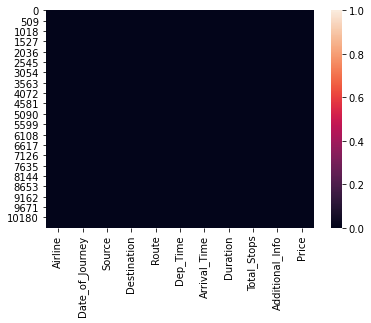

In [14]:
sns.heatmap(df_train.isnull())

In [15]:
import missingno as msno

<AxesSubplot:>

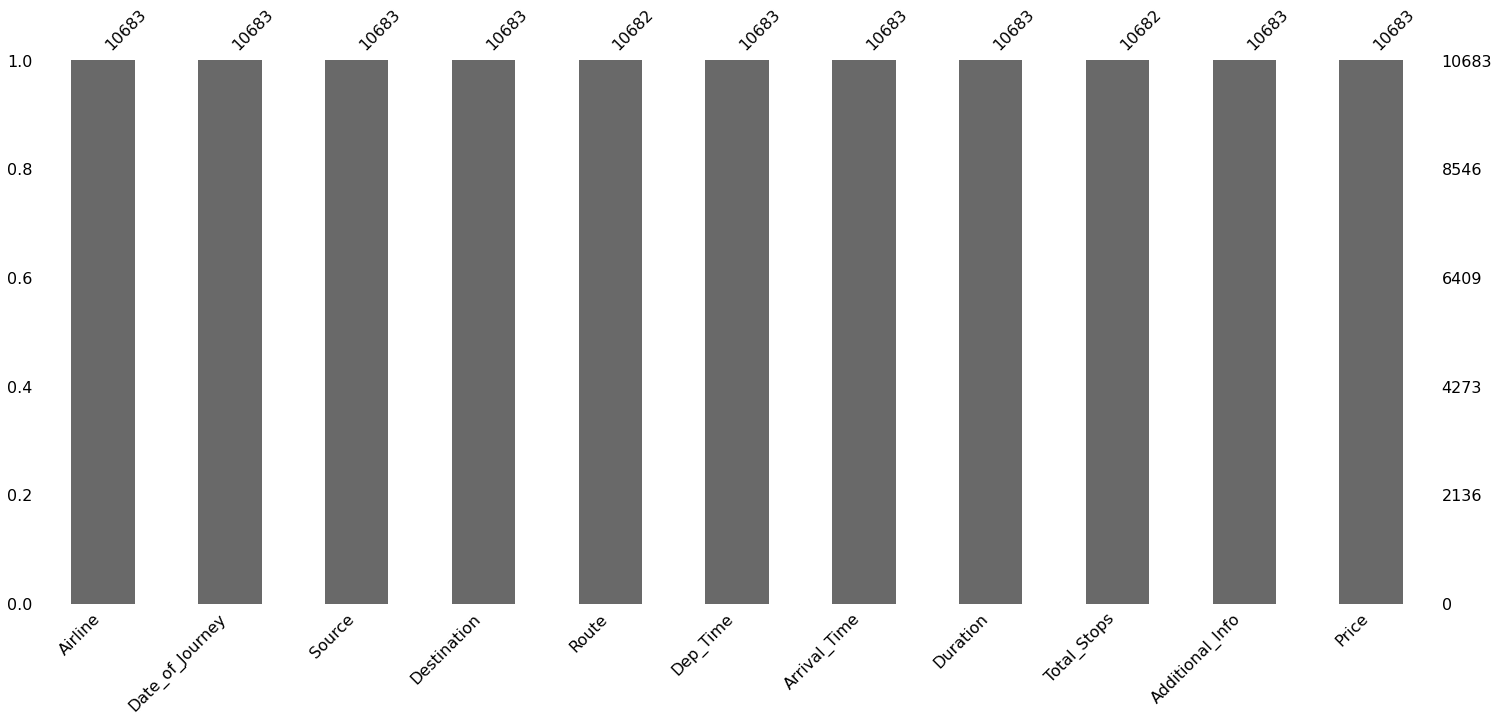

In [16]:
msno.bar(df_train)

In [17]:
# Unique Data:

df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [18]:
#chekcing unique values for all training dataset features including the target:
for i in df_train.columns:
    print(df_train[i].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

In [19]:
df_train.corr()

,Price
Price,1.0


In [20]:
# checking for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
# fill the null values:

df_train["Route"] = df_train["Route"].fillna(df_train["Route"].mode()[0])

df_train["Total_Stops"] = df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode()[0])


In [22]:
# checking for null values again
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

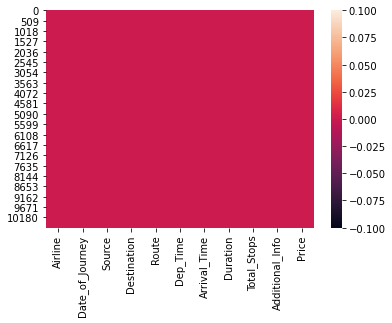

In [23]:
sns.heatmap(df_train.isnull())

In [24]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [26]:
# Checking for null values in our dataset
df_test.isnull

<bound method DataFrame.isnull of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20   

In [27]:
# Checking for null values in our dataset
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

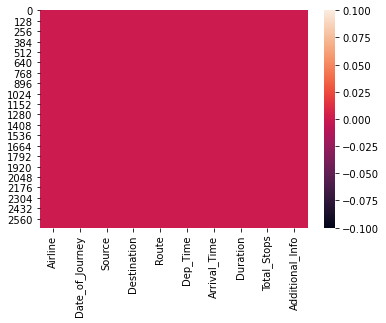

In [28]:
sns.heatmap(df_test.isnull())

<AxesSubplot:>

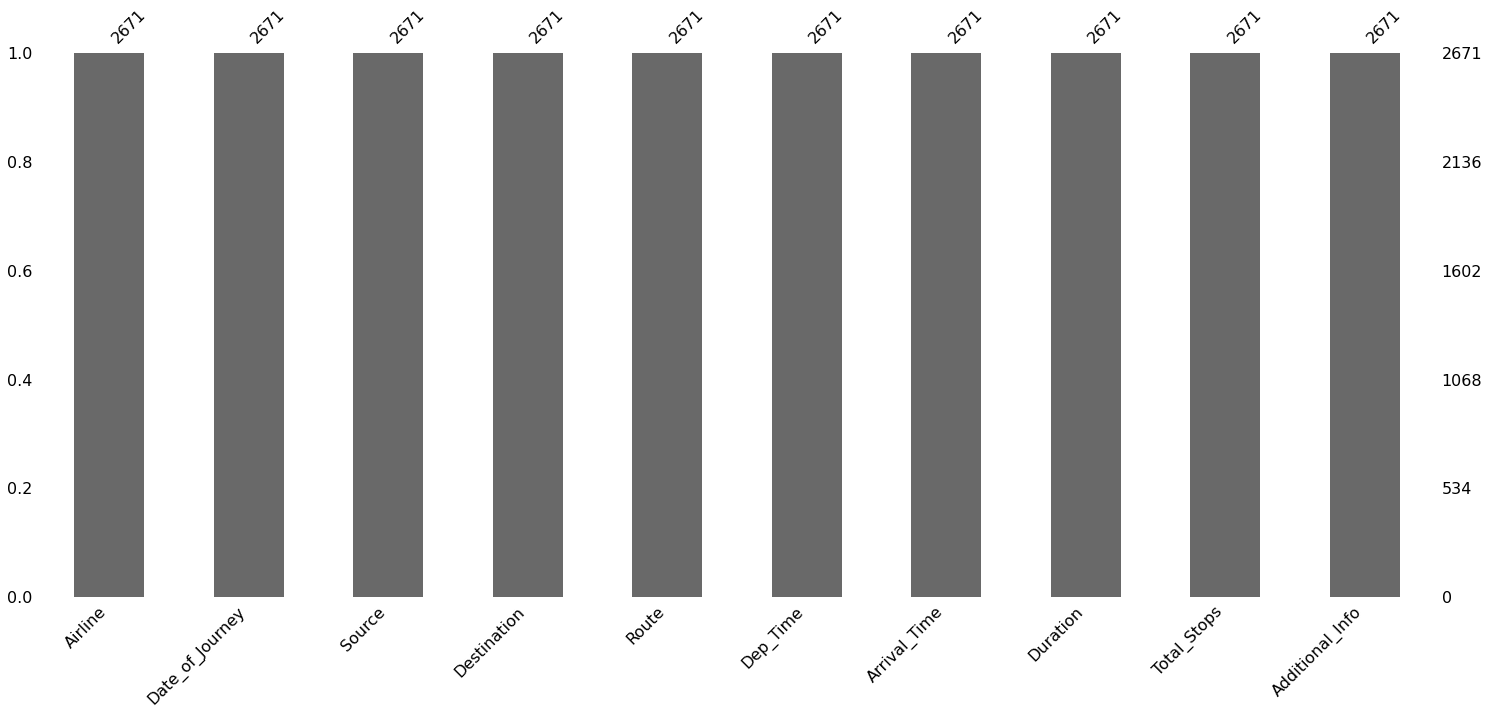

In [29]:
msno.bar(df_test)

In [30]:
# Unique Data:

df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [31]:
#chekcing unique values for all training dataset features including the target:
for i in df_test.columns:
    print(df_test[i].unique())

['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
['6/06/2019' '12/05/2019' '21/05/2019' '24/06/2019' '12/06/2019'
 '12/03/2019' '1/05/2019' '15/03/2019' '18/05/2019' '21/03/2019'
 '15/06/2019' '15/05/2019' '3/06/2019' '06/03/2019' '24/03/2019'
 '6/03/2019' '9/05/2019' '18/03/2019' '6/04/2019' '1/06/2019' '3/03/2019'
 '27/03/2019' '9/06/2019' '3/05/2019' '1/04/2019' '18/06/2019'
 '15/04/2019' '6/05/2019' '9/03/2019' '3/04/2019' '27/06/2019'
 '21/06/2019' '21/04/2019' '18/04/2019' '9/04/2019' '24/05/2019'
 '01/03/2019' '09/03/2019' '27/05/2019' '03/03/2019' '27/04/2019'
 '1/03/2019' '24/04/2019' '12/04/2019']
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
['DEL → BOM → COK' 'CCU → MAA → BLR' 'BLR → DEL' 'BLR → TRV → DEL'
 'CCU → HYD → BLR' 'CCU → BLR' 'CCU → BOM → BLR' 'DEL → MAA → BOM → C

In [32]:
df_test.corr()

""


In [33]:
# Checking descriptive data description for continous data column.
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [34]:
df_test.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [35]:
# Checking descriptive data description for continous data column.
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [36]:
df_train.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2377,233,423,550,5626,8345


In [37]:
df_train["Route"].value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → BOM → IXC → DEL             1
BOM → JDH → JAI → DEL → HYD       1
BOM → VNS → DEL → HYD             1
BOM → JLR → HYD                   1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

In [38]:
df_test["Route"].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
CCU → DEL → COK → TRV → BLR      1
BLR → VGA → DEL                  1
BLR → BOM → IDR → DEL            1
BLR → BOM → IDR → GWL → DEL      1
BOM → VGA → TIR → HYD            1
Name: Route, Length: 100, dtype: int64

In [39]:
df_train["Total_Stops"].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
df_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

## Analysis by Visualizataion :

### (i) Univeriate Analysis

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

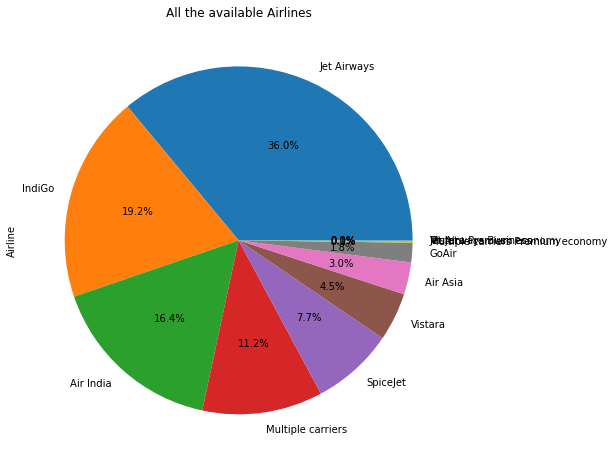

In [41]:
plt.figure(figsize=(10,8))

df_train['Airline'].value_counts().plot.pie(autopct='%1.1f%%').set(title='All the available Airlines')
df_train['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

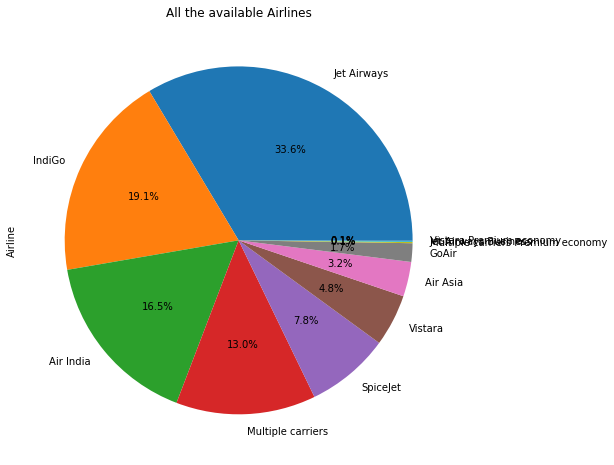

In [42]:
plt.figure(figsize=(10,8))

df_test['Airline'].value_counts().plot.pie(autopct='%1.1f%%').set(title='All the available Airlines')
df_test['Airline'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

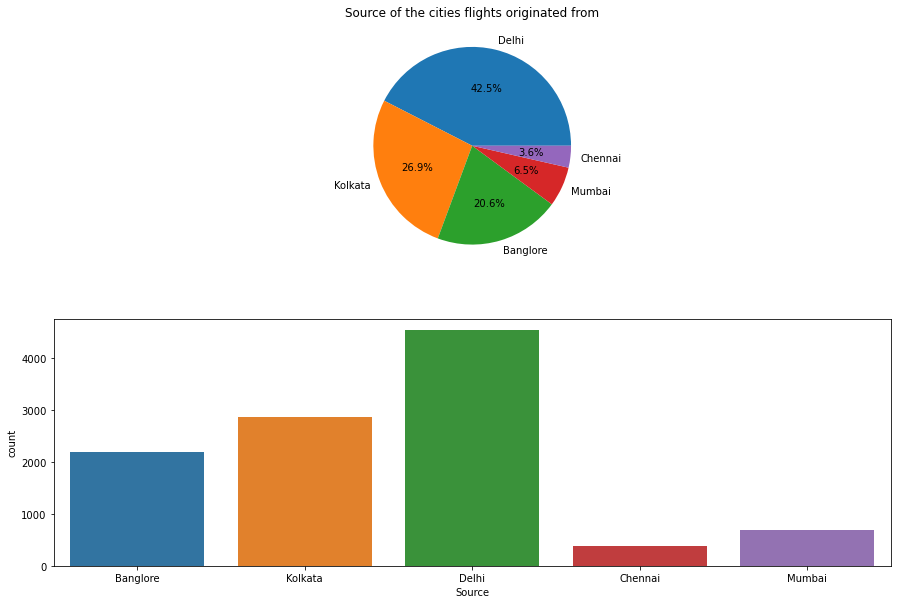

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
df_train['Source'].value_counts().plot.pie(autopct='%1.1f%%').set(title='Source of the cities flights originated from') 

plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df_train['Source'])
df_train['Source'].value_counts()

###### Delhi being the capital city of India, has one of the largest Airports and compared to other ctites it has more number of flight connectivitie, people from Haryana, Chattisgarh generally travel from Delhi.various cities and Delhi seems to be ranking at the top followed by Kolkata and then by Bangalore.

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

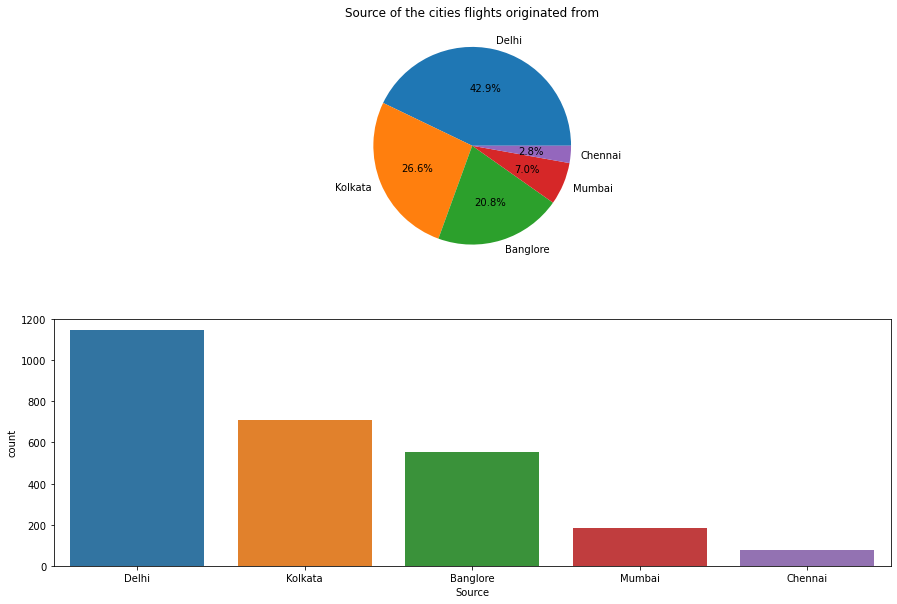

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
df_test['Source'].value_counts().plot.pie(autopct='%1.1f%%').set(title='Source of the cities flights originated from') 

plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df_test['Source'])
df_test['Source'].value_counts()

###### Delhi being the capital city of India, has one of the largest Airports and compared to other ctites it has more number of flight connectivitie, people from Haryana, Chattisgarh generally travel from Delhi.various cities and Delhi seems to be ranking at the top followed by Kolkata and then by Bangalore.

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


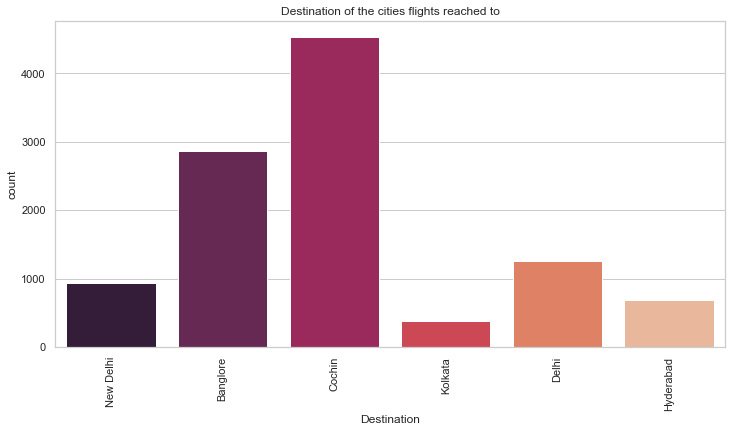

In [45]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Destination", data=df_train, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
print(df_train['Destination'].value_counts())
plt.show()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


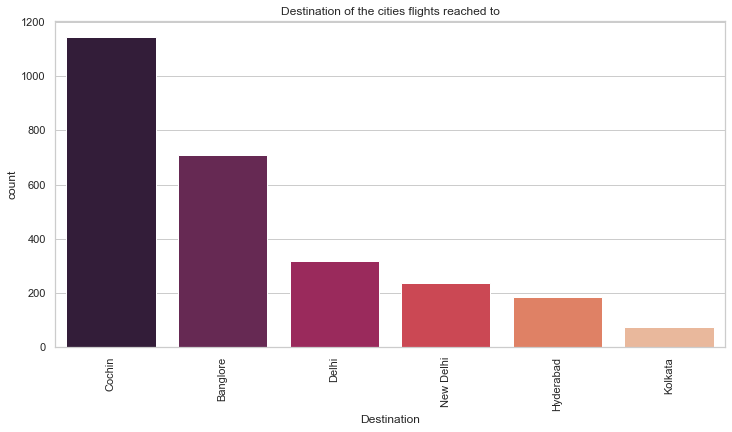

In [46]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Destination", data=df_test, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
print(df_test['Destination'].value_counts())
plt.show()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


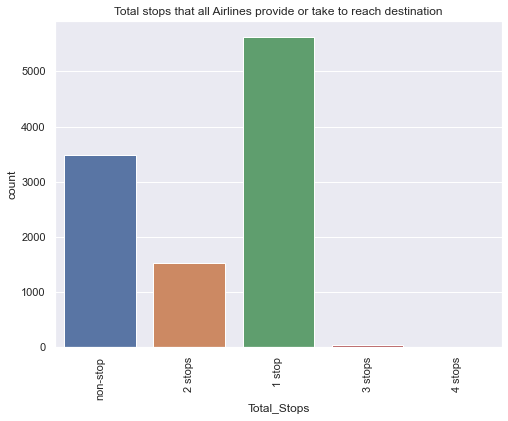

In [47]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Total_Stops", data=df_train).set(title='Total stops that all Airlines provide or take to reach destination') 
plt.xticks(rotation=90)
print(df_train['Total_Stops'].value_counts())
plt.show()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


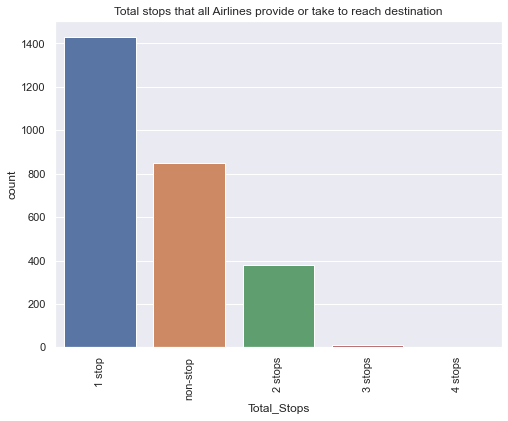

In [48]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot("Total_Stops", data=df_test).set(title='Total stops that all Airlines provide or take to reach destination') 
plt.xticks(rotation=90)
print(df_test['Total_Stops'].value_counts())
plt.show()

###### Plot can see the price distribution across the number of stops.

###### Flights with "one- stop" have more prices compared to other modes of halt.

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64


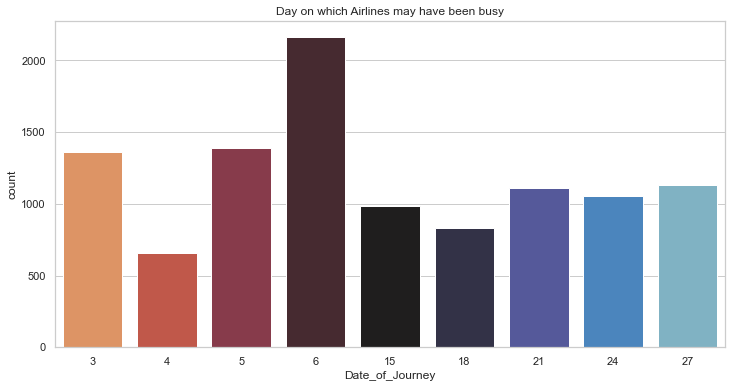

In [49]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).day,
                   data=df_train, palette= "icefire_r").set(title='Day on which Airlines may have been busy') 
print(df_train['Date_of_Journey'].value_counts())
plt.show()

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
21/04/2019     22
18/06/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
1/03/2019      12
18/04/2019     12
12/04/2019     11
Name: Date_of_Journey, dtype: int64


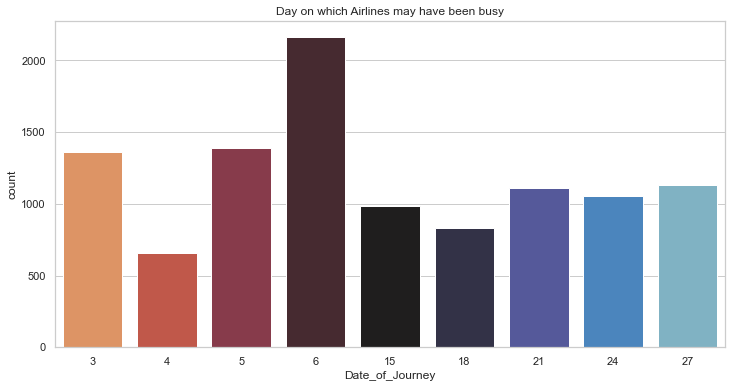

In [50]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).day,
                   data=df_test, palette= "icefire_r").set(title='Day on which Airlines may have been busy') 
print(df_test['Date_of_Journey'].value_counts())
plt.show()

###### Plot we can observe that January and February months of 2019 hd highest price tickets.

### (ii) Bivariate Analysis

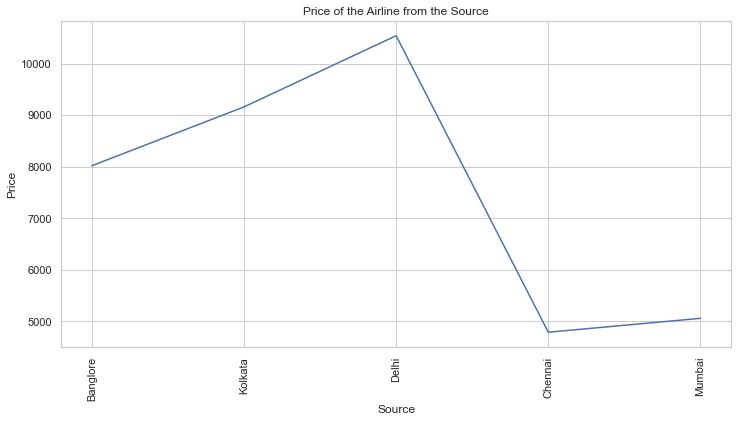

In [51]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_train, x="Source", y="Price", ci=None).set(title='Price of the Airline from the Source')
plt.xticks(rotation=90)
plt.show()

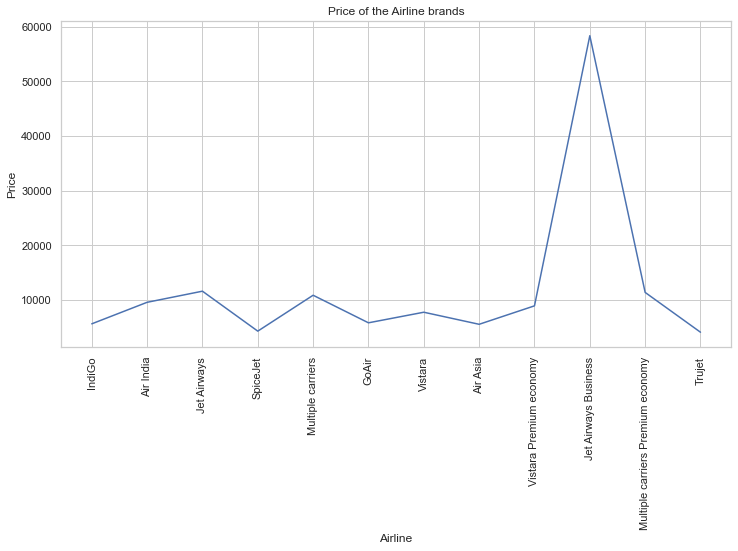

In [52]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_train, x="Airline", y="Price", ci=None).set(title='Price of the Airline brands')
plt.xticks(rotation=90)
plt.show()

###### Flights charge roughly 10,000 to 11,000 Rs for ticket, but Jet Airways Business charges more than 55,000 Rs."Business Class" has a lot of additional benefits.

###### An Economy class doesn't have much benefits and hence people prefer this more as it's relatively cheaper that other class.

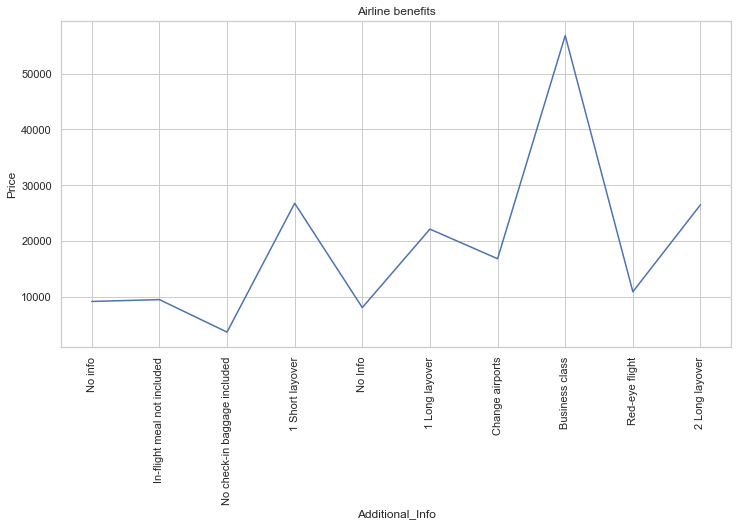

In [53]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_train, x="Additional_Info", y="Price", ci=None).set(title='Airline benefits')
plt.xticks(rotation=90)
plt.show()

###### Plot shows us the number of stops given by flights

###### Majority of flights have "one stop" and this shows that flights have reached directly to the destination with more amout of time for halt.

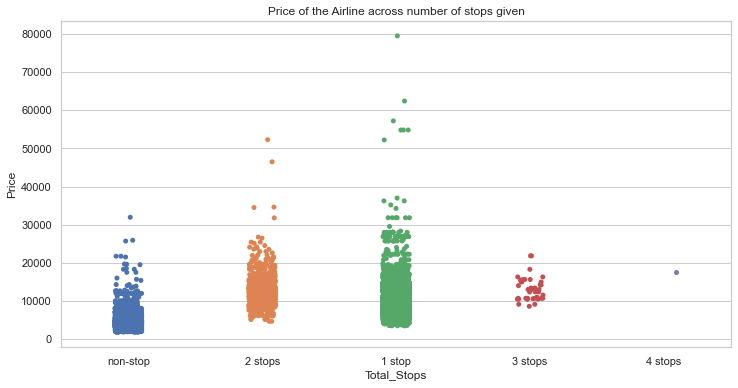

In [54]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Total_Stops", y="Price", data=df_train).set(title='Price of the Airline across number of stops given')
plt.show()

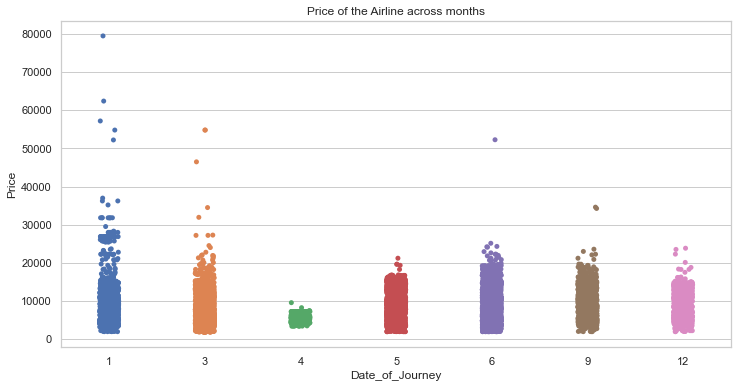

In [55]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x=pd.DatetimeIndex(df_train['Date_of_Journey']).month, 
                   y="Price", data=df_train).set(title='Price of the Airline across months')
plt.show()

###### Displaying the total columns names to select features for encoding

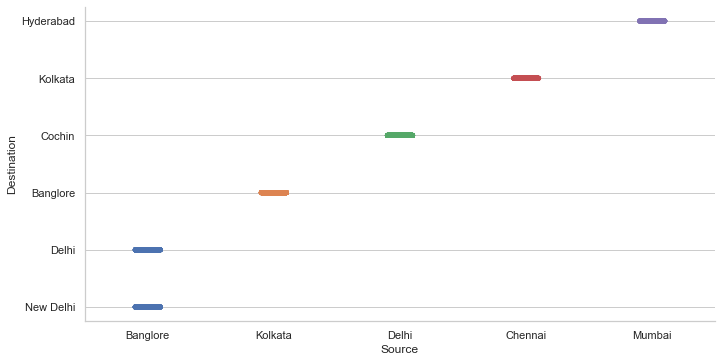

In [56]:
sns.catplot(x='Source',y='Destination',data=df_train,height=5,aspect=2)

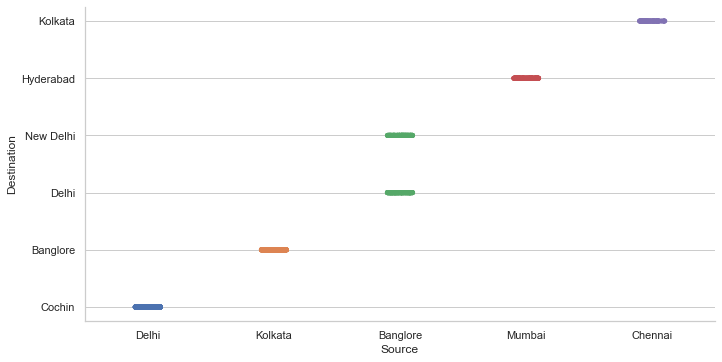

In [57]:
sns.catplot(x='Source',y='Destination',data=df_test,height=5,aspect=2)

<AxesSubplot:ylabel='Route'>

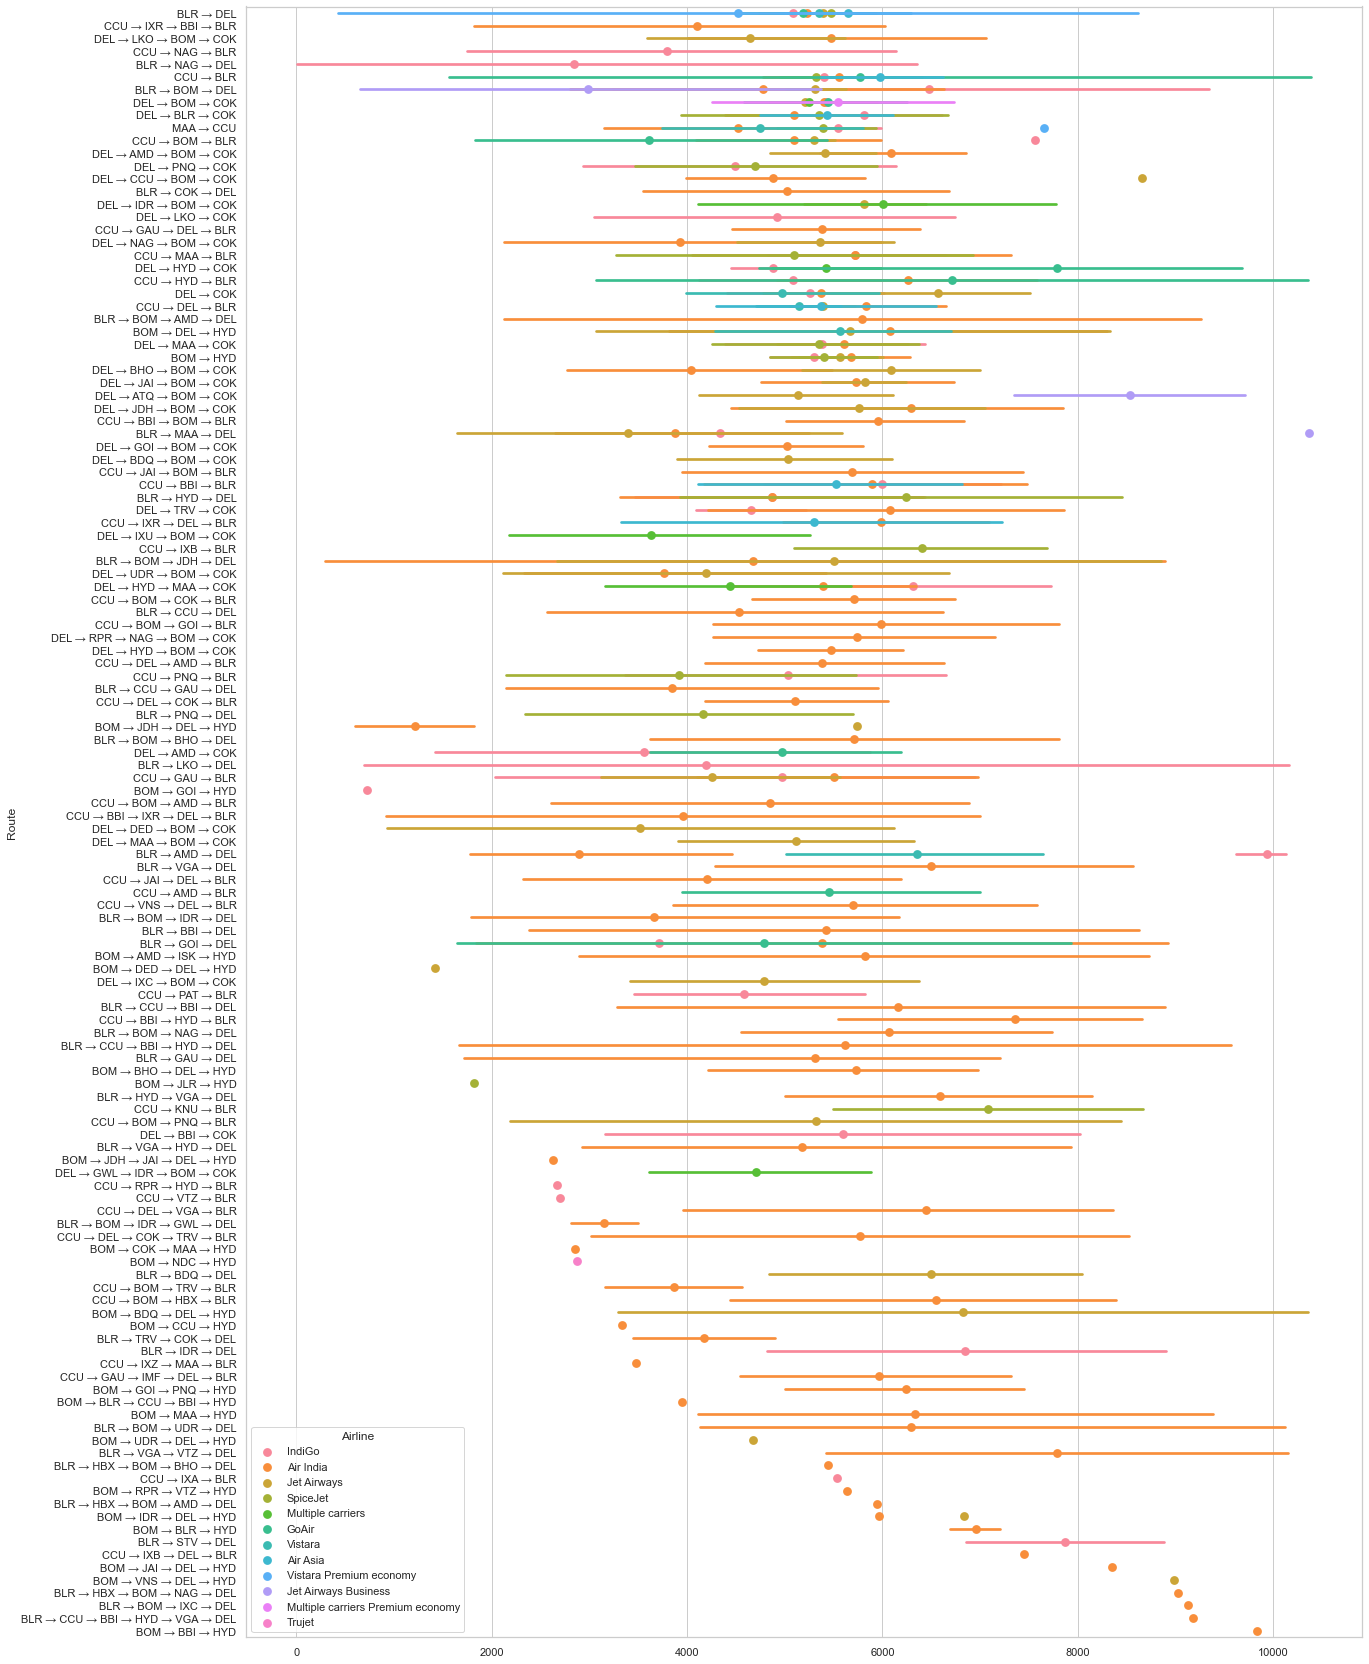

In [58]:
plt.figure(figsize=(20,30))
sns.set_style('whitegrid')
sns.pointplot(x=df_train.index,y='Route',data=df_train, hue='Airline',join=False)

<AxesSubplot:ylabel='Route'>

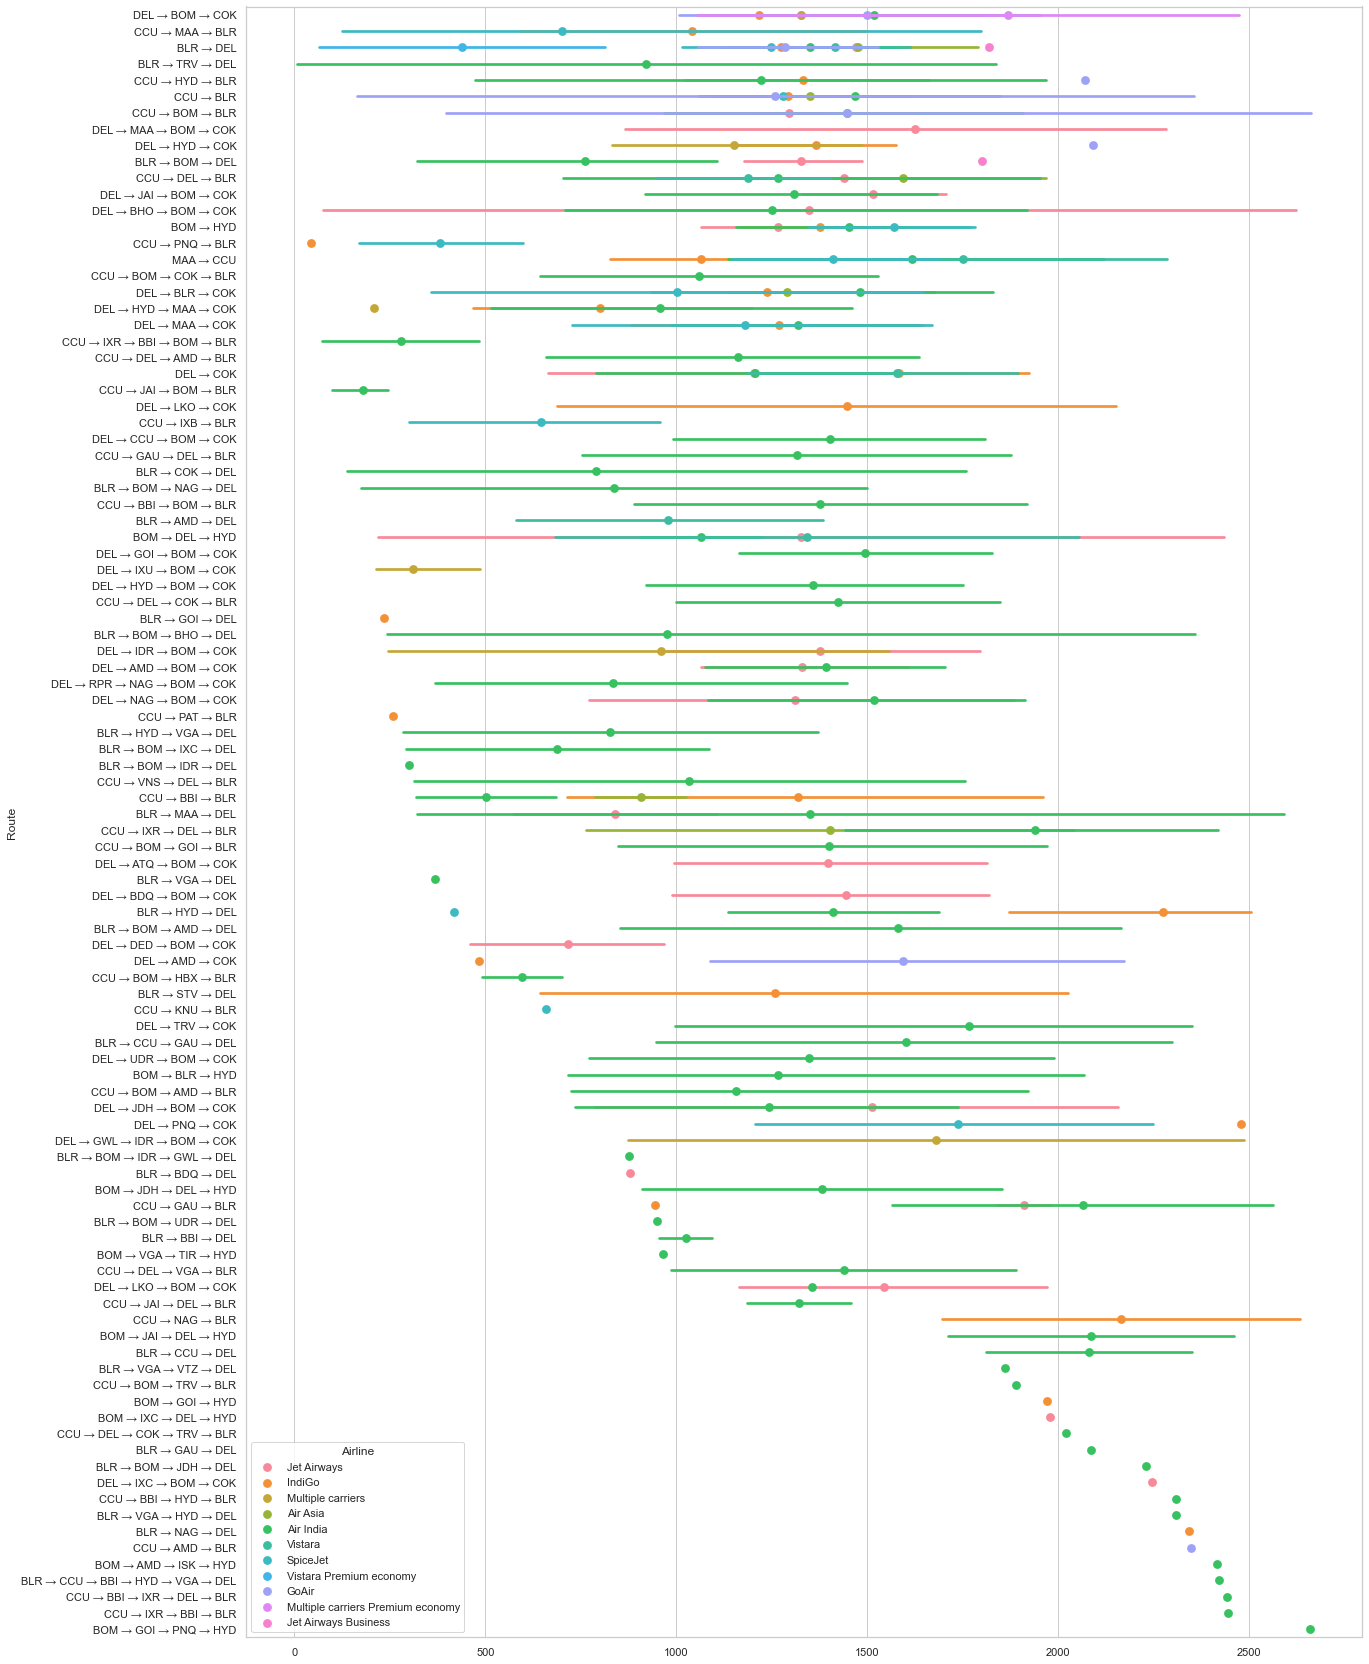

In [59]:
plt.figure(figsize=(20,30))
sns.set_style('whitegrid')
sns.pointplot(x=df_test.index,y='Route',data=df_test, hue='Airline',join=False)

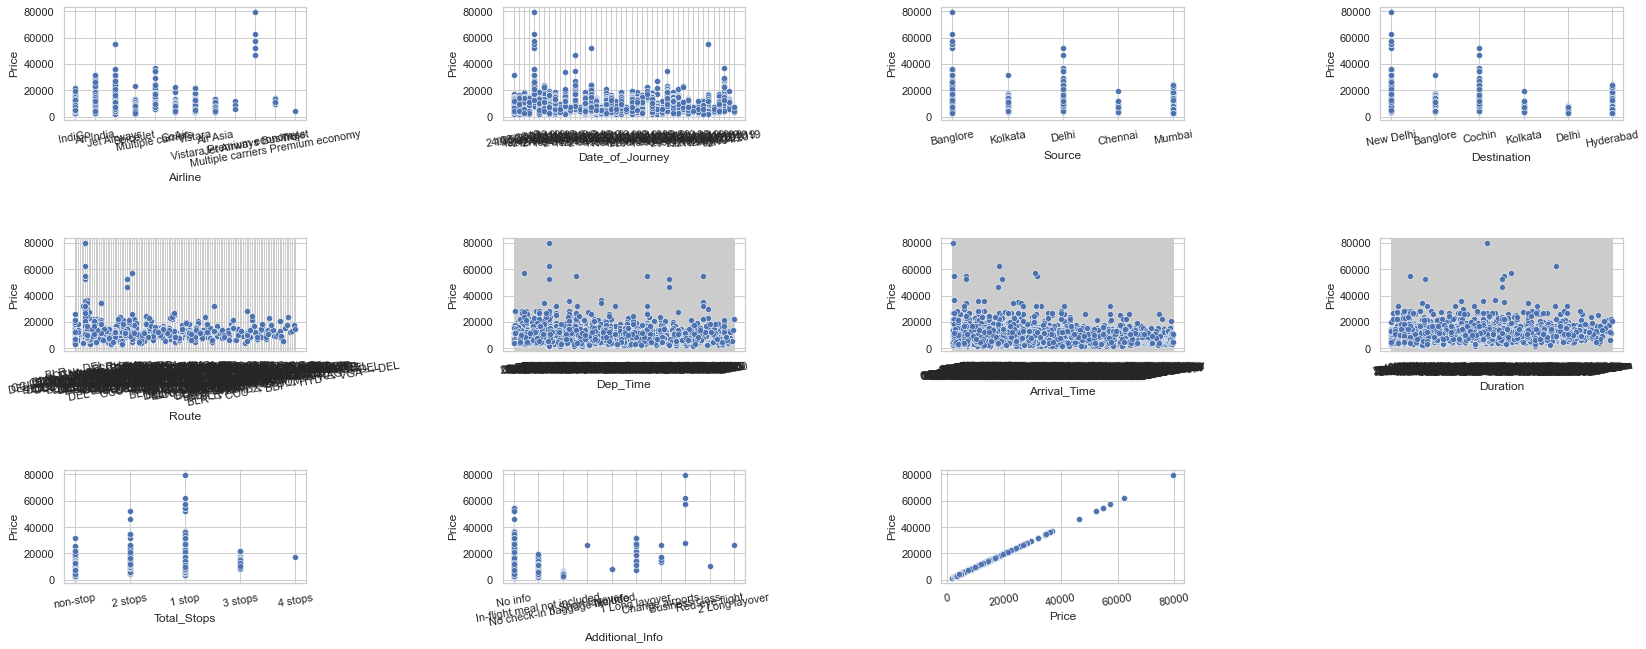

In [60]:
#Numerical features scatterplot of the data dispersion:

numerical=df_train.columns
c=1
plt.figure(figsize=(24,64))
for i in numerical:
    plt.subplot(20,4,c)
    sns.scatterplot(x =df_train[i], y=df_train['Price'])
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

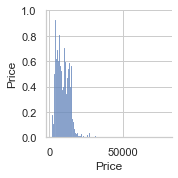

In [61]:
sns.pairplot(df_train)

### (iii) multivariate analysis

In [62]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [63]:
# storing columns  in cols variable
cols =['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']

In [64]:
# Before that we need to convert our catagorical data into numaric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
df_train[cols] = df_train[cols].apply(l_encoder.fit_transform) # Applying label encoder on all the catagorical columns

In [65]:
df_train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
5,8,27,3,0,64,66,830,235,4,8,3873
6,4,8,0,5,5,172,742,65,0,5,11087
7,4,0,0,5,5,55,463,145,0,8,22270
8,4,8,0,5,5,65,742,185,0,5,11087
9,6,30,2,1,104,91,1124,341,0,8,8625


Airline              AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
Date_of_Journey    AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
Source             AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
Destination        AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Route              AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Dep_Time           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Arrival_Time       AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Duration           AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
Total_Stops          AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
Additional_Info    AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
Price              AxesSubplot(0.322872,0.739237;0.0824468x0.0639...
dtype: object

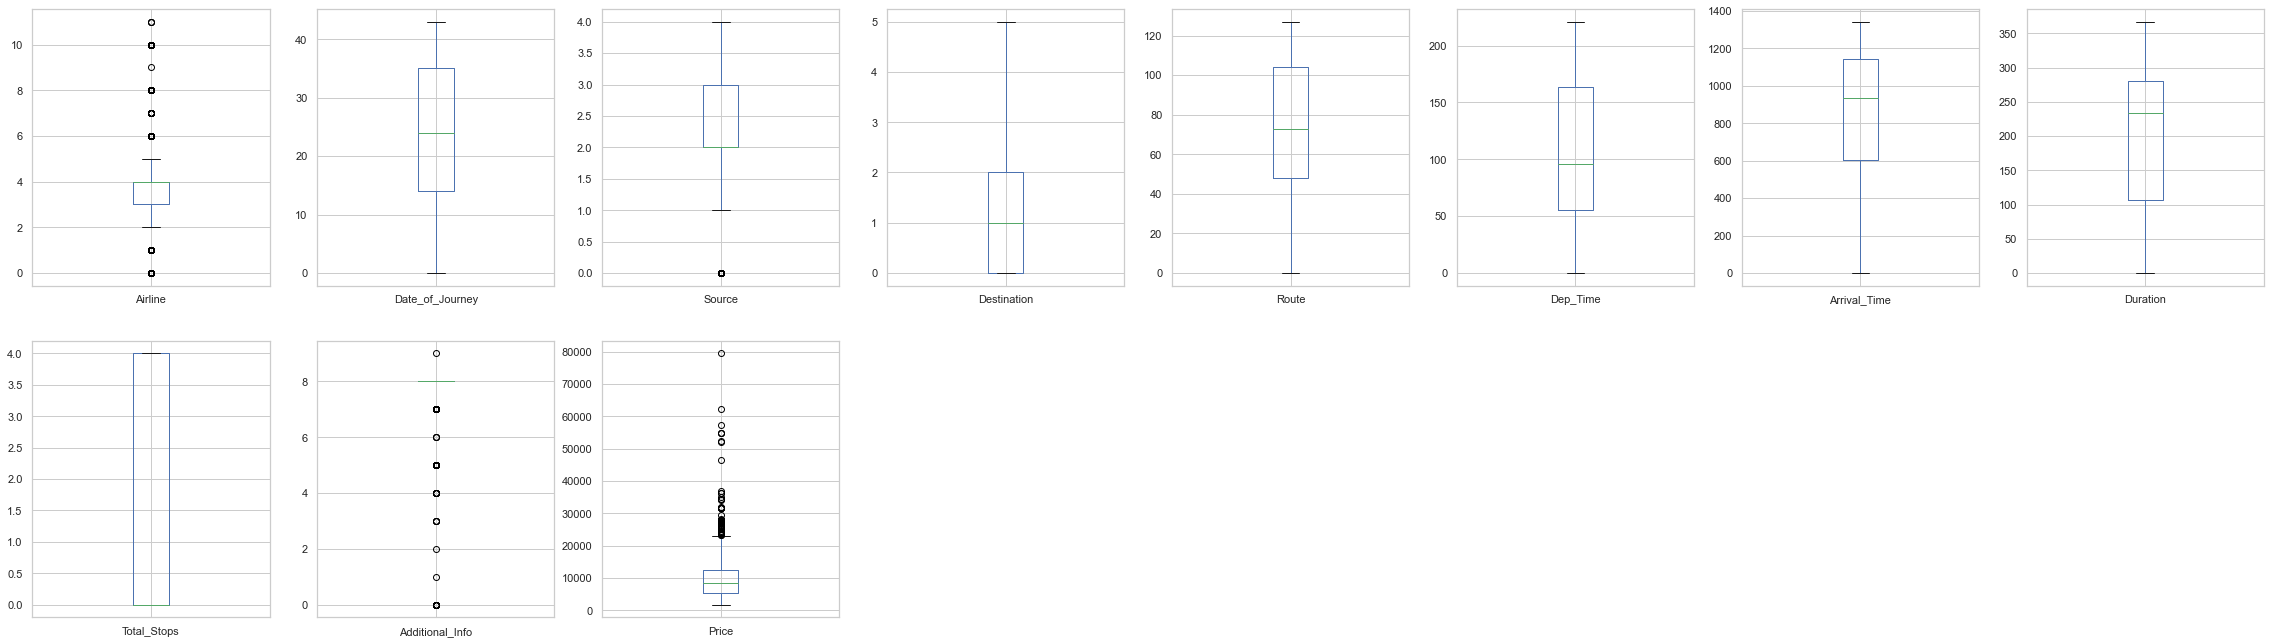

In [66]:
#plotting the boxplot for each column in order to check the outliers 
df_train.plot(kind='box',subplots = True,layout=(10,8),figsize = (40,60)) 

In [67]:
# Difference between mean and std also seems fine .

df_train.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


In [68]:
# Before that we need to convert our catagorical data into numaric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
df_test[cols] = df_test[cols].apply(l_encoder.fit_transform) # Applying label encoder on all the catagorical columns

In [69]:
df_test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5
5,4,11,2,1,76,146,432,93,0,3
6,1,8,0,5,24,44,662,69,0,5
7,3,6,3,0,57,116,620,261,0,5
8,3,12,3,0,43,70,442,215,4,5
9,4,18,3,0,45,127,662,283,0,5


Airline              AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
Date_of_Journey    AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
Source             AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
Destination        AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Route              AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Dep_Time           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Arrival_Time       AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Duration           AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
Total_Stops          AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
Additional_Info    AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
dtype: object

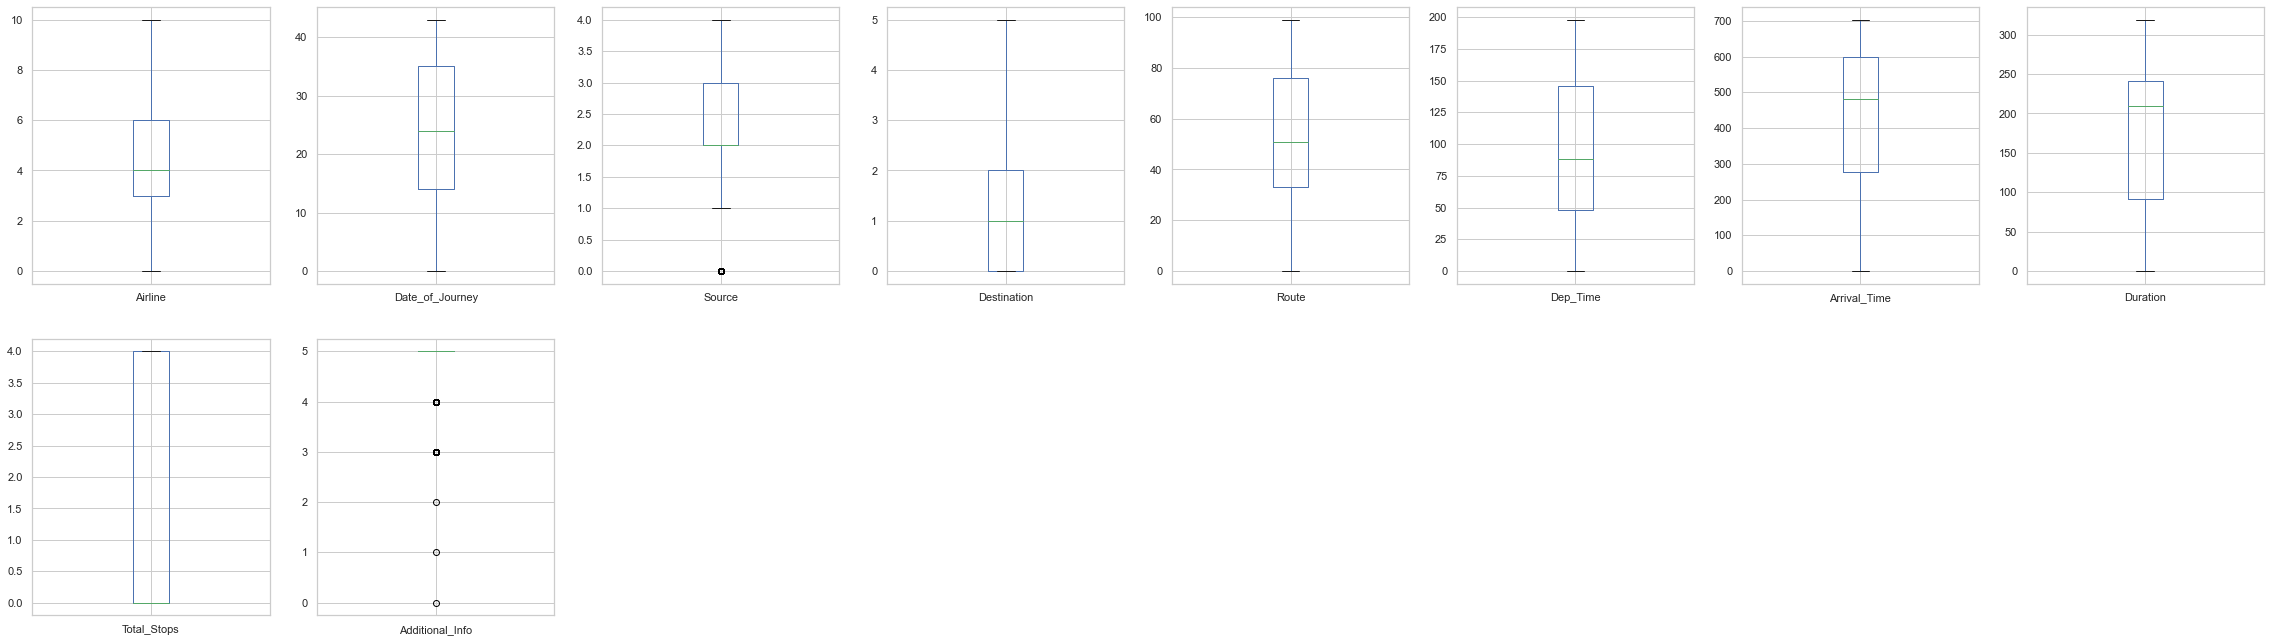

In [70]:
#plotting the boxplot for each column in order to check the outliers 
df_test.plot(kind='box',subplots = True,layout=(10,8),figsize = (40,60)) 

In [71]:
# Difference between mean and std also seems fine .

df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,23.662673,1.961438,1.432797,54.356421,96.249719,435.586672,169.453014,1.422688,4.634594
std,2.295657,12.536017,1.184328,1.467971,27.128993,54.620936,193.250349,93.907162,1.795728,0.760781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,33.000000,48.000000,276.000000,91.000000,0.000000,5.000000
50%,4.000000,24.000000,2.000000,1.000000,51.000000,88.000000,481.000000,209.000000,0.000000,5.000000
75%,6.000000,35.000000,3.000000,2.000000,76.000000,146.000000,600.000000,241.000000,4.000000,5.000000
max,10.000000,43.000000,4.000000,5.000000,99.000000,198.000000,703.000000,319.000000,4.000000,5.000000


### correlation:

In [72]:
corr_matrix = df_train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Route              0.164118
Arrival_Time       0.027377
Source             0.015998
Dep_Time           0.002949
Date_of_Journey   -0.036942
Airline           -0.039520
Additional_Info   -0.065478
Destination       -0.071112
Duration          -0.144270
Total_Stops       -0.571174
Name: Price, dtype: float64

<AxesSubplot:>

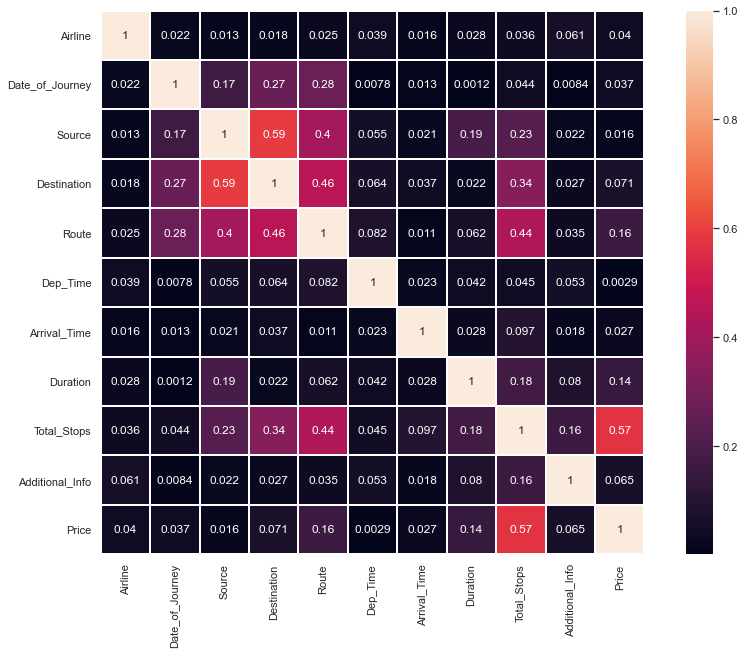

In [73]:
# Let's check correlationship between target variable and features variable.
data_corr = df_train.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

<AxesSubplot:>

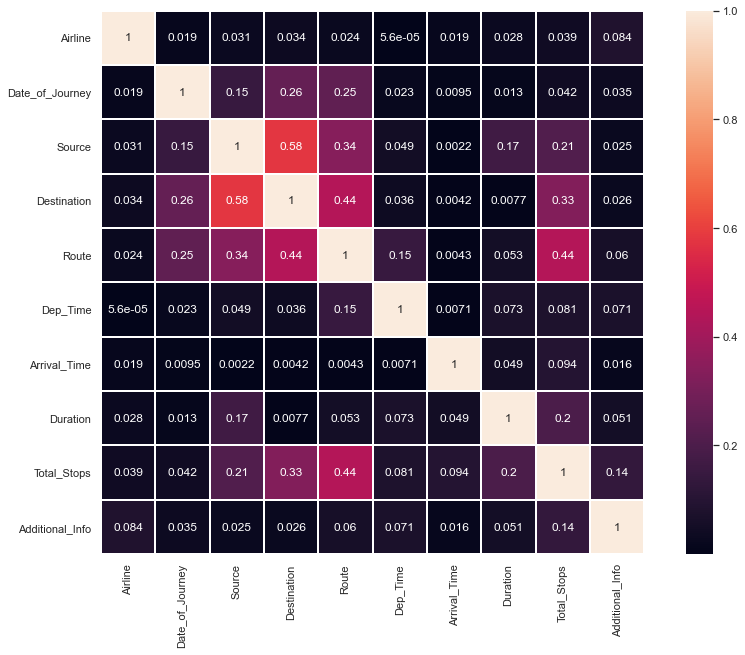

In [74]:
# Let's check correlationship between target variable and features variable.
data_corr = df_test.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

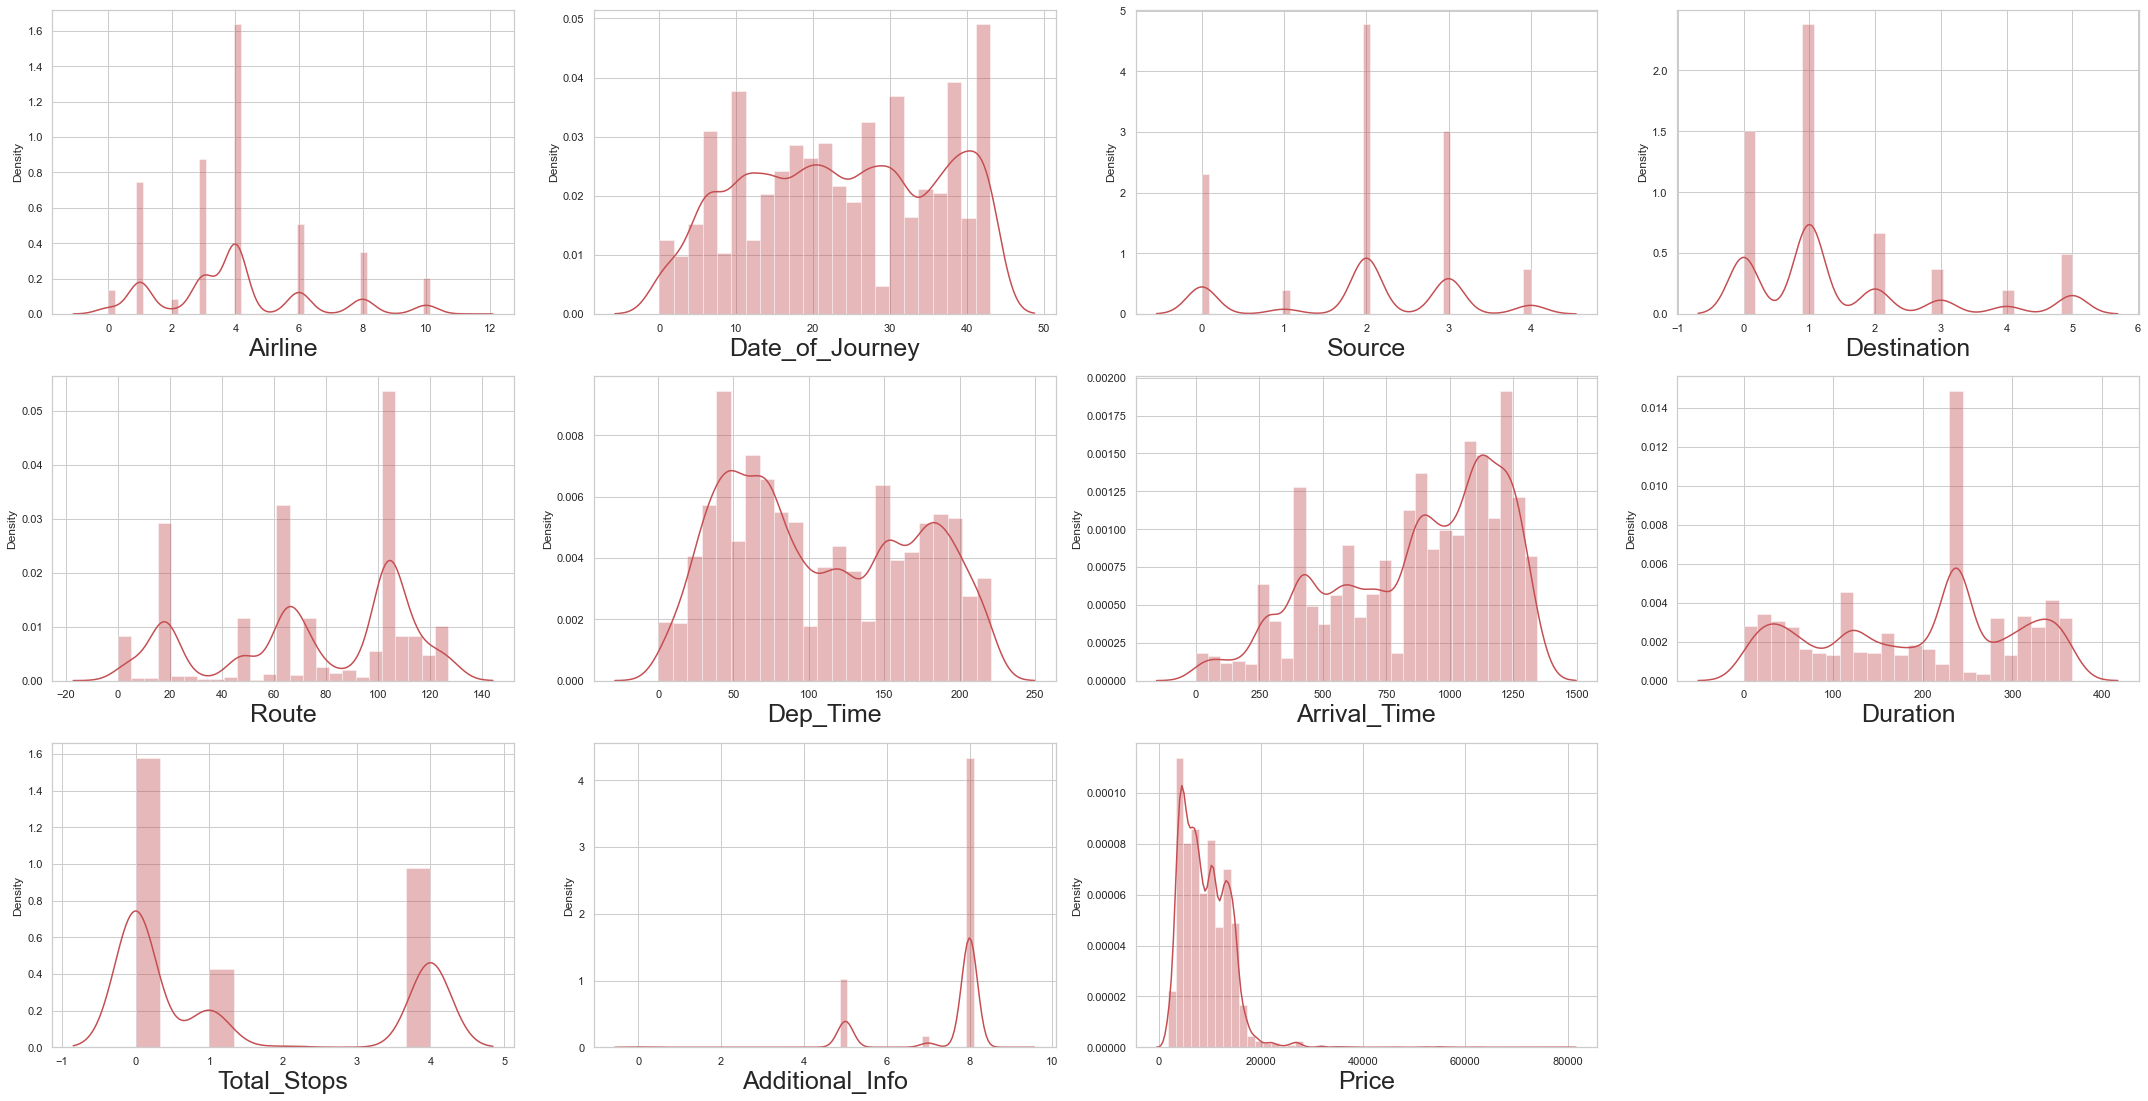

In [75]:
# Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df_train:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_train[column],color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

In [76]:
df_train.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
dtype: float64

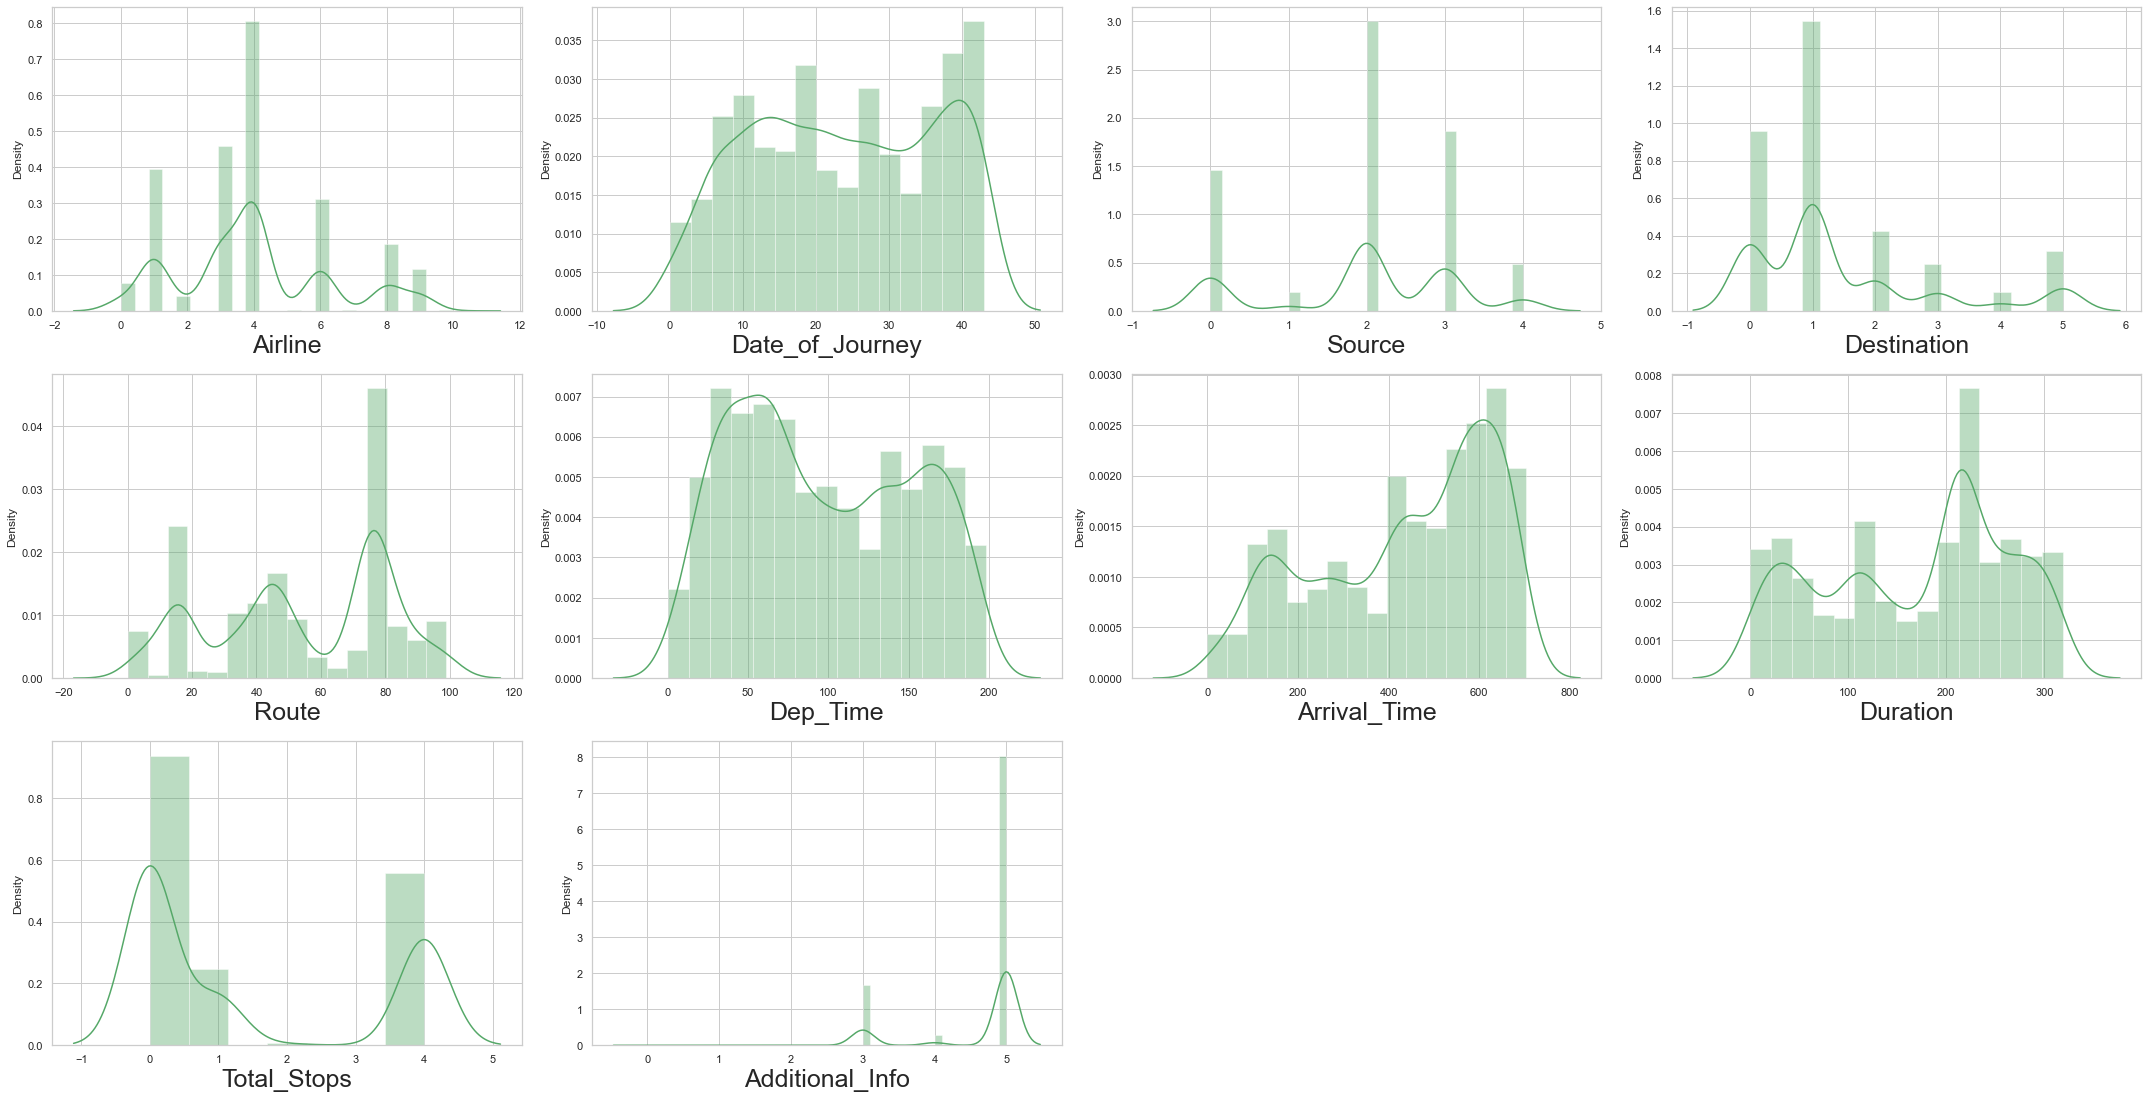

In [77]:
# Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df_test:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_test[column],color='g')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

In [78]:
df_test.skew()

Airline            0.483882
Date_of_Journey   -0.044181
Source            -0.424997
Destination        1.263630
Route             -0.281807
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Total_Stops        0.672623
Additional_Info   -1.719119
dtype: float64

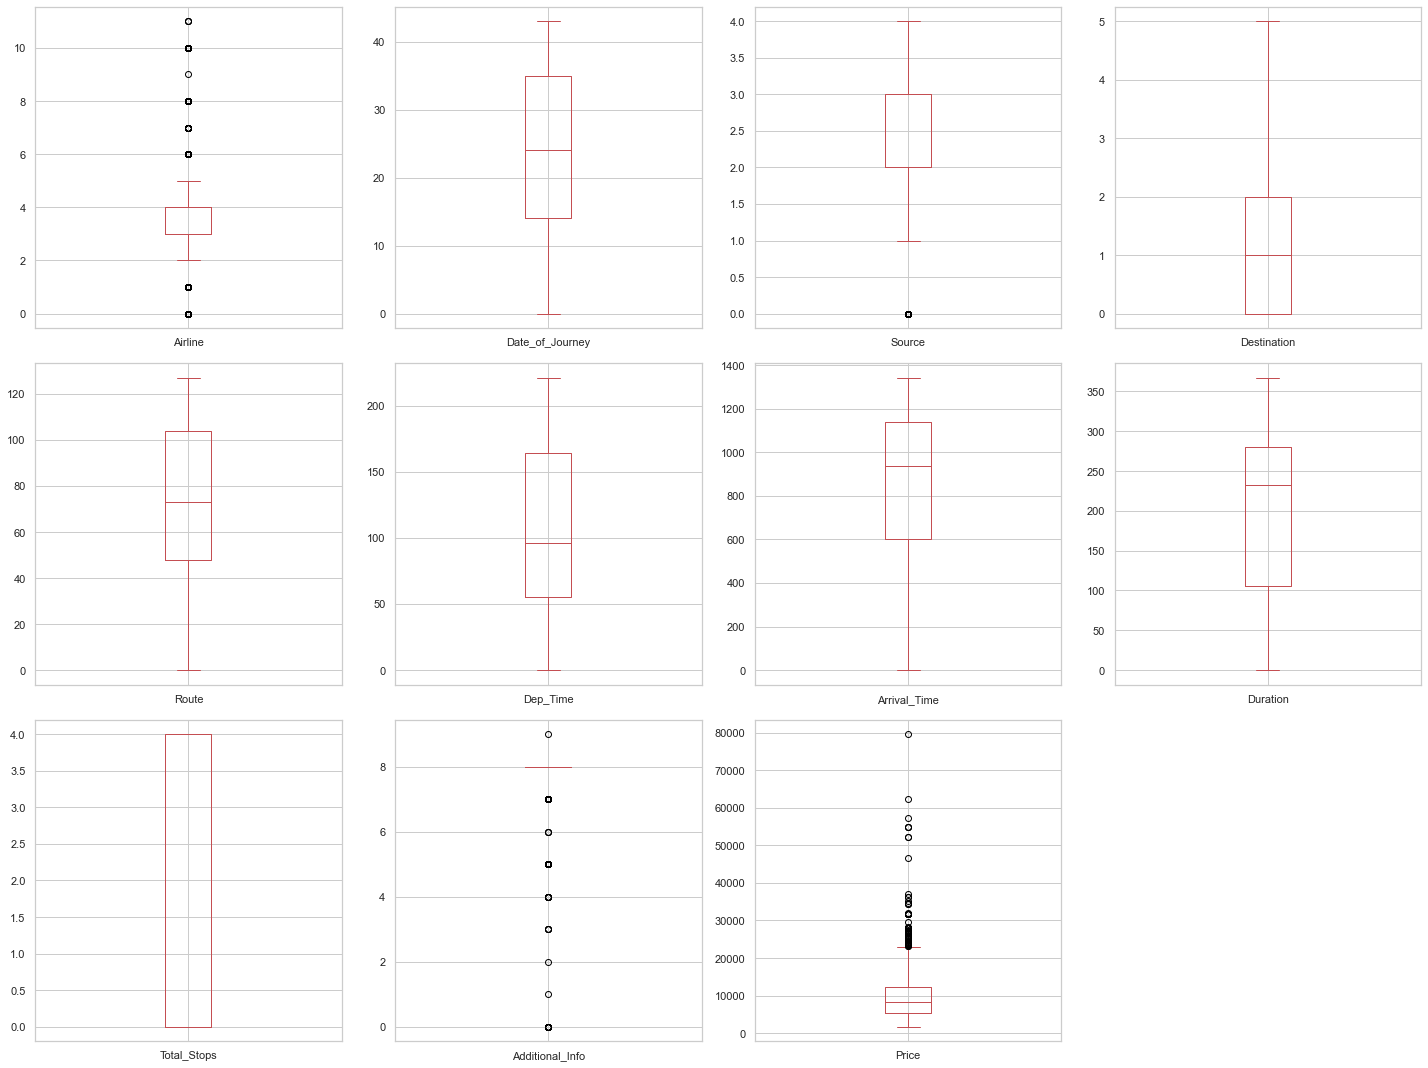

In [79]:
# Before removing skewness lets check with Outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in df_train:
    if count<=12:
        ax = plt.subplot(3,4,count)
        df_train[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

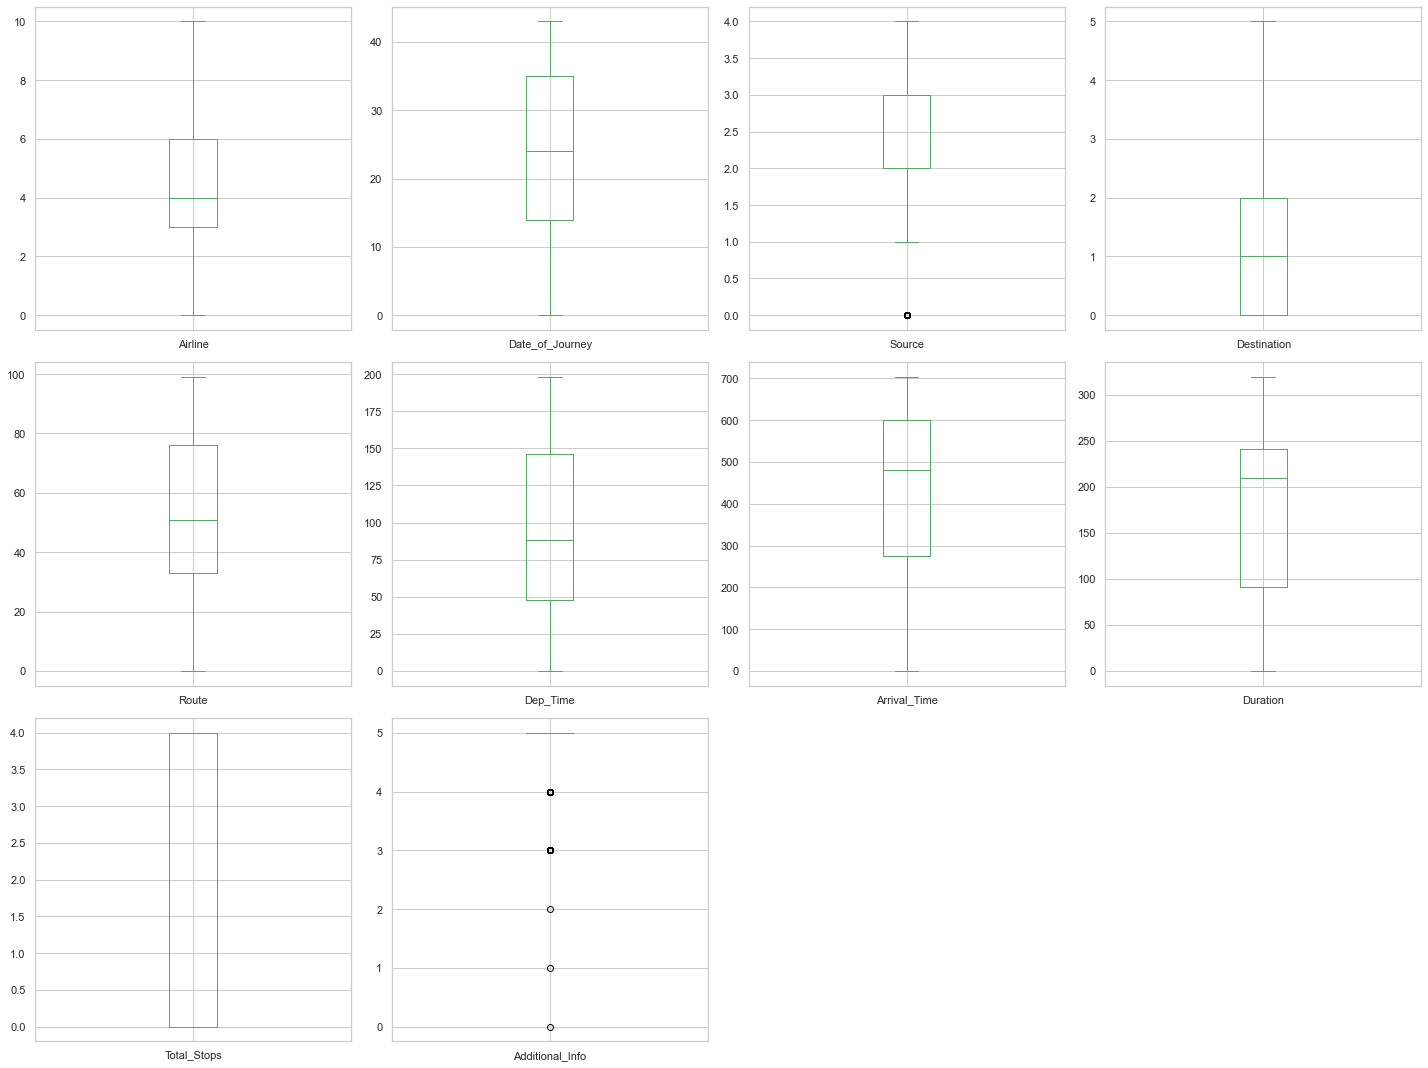

In [80]:
# Before removing skewness lets check with Outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in df_test:
    if count<=12:
        ax = plt.subplot(3,4,count)
        df_test[column].plot(kind = 'box',color ='g')
    count +=1
plt.tight_layout()

### Splitting dataset in x (features) and y (target column)

In [81]:
# train & test dataset with featurs:

x = df_train.drop(columns = ["Price"], axis=1)

y = df_train["Price"]


x1 = df_test

### StandardScaler

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled1 = scaler.fit_transform(x1)

### Train and Test data:

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

### Finding best model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

### DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9969229413607383
Mean Absolute Error (MAE):  957.3621424856996
Mean Squared Error (MSE):  4920136.267897382
Root Mean Squared Error (RMSE):  2218.1380182255075


### RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9774586694003294
Mean Absolute Error (MAE):  824.9289642961824
Mean Squared Error (MSE):  2649793.466803655
Root Mean Squared Error (RMSE):  1627.818622206926


### ExtraTreesRegressor

In [87]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)
print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9969228713310461
Mean Absolute Error (MAE):  886.4335085803432
Mean Squared Error (MSE):  3103521.6371155763
Root Mean Squared Error (RMSE):  1761.681480039901


### KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7949012386830101
Mean Absolute Error (MAE):  1454.4657722308891
Mean Squared Error (MSE):  5808108.92175975
Root Mean Squared Error (RMSE):  2410.001850986789


### GradientBoostingRegressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

grid_reg = GradientBoostingRegressor()
grid_reg.fit(x_train,y_train)

y_pred = grid_reg.predict(x_test)

print("Adjusted R2 squared : ",grid_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8334371698202327
Mean Absolute Error (MAE):  1295.6861043742717
Mean Squared Error (MSE):  3926985.7560442183
Root Mean Squared Error (RMSE):  1981.6623718596006


### Cross validation

In [90]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(grid_reg, x, y, cv=5)
print("Cross Validation score of GradientBoostingRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.774849114932161
Cross Validation score of RandomForestRegressor model is: 0.8631163496359286
Cross Validation score of ExtraTreesRegressor model is: 0.8589019477614613
Cross Validation score of KNeighborsRegressor model is: 0.581423539529918
Cross Validation score of GradientBoostingRegressor model is: 0.8054952816482123


### Hyper-parameter Tuning :

In [91]:
parameters = {"loss":["ls", "lad", "huber", "quantile"],
              "criterion":["friedman_mse", "mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "n_estimators":[50, 70, 90, 100, 130, 150],
              "random_state":[50, 70, 90, 100, 130, 150],
              "tol":[1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
              }

### Using RandomizedSearchCV :

In [92]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_iter=10)

In [93]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 70, 90, 100, 130,
                                                         150],
                                        'random_state': [50, 70, 90, 100, 130,
                                                         150],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]})

In [94]:
RCV.best_params_

{'tol': 1e-05,
 'random_state': 100,
 'n_estimators': 130,
 'max_features': 'log2',
 'loss': 'ls',
 'criterion': 'friedman_mse'}

### Rebulding the model:

In [95]:
mod_grid_reg = GradientBoostingRegressor(learning_rate= 0.0001, random_state= 50, n_estimators= 150, max_features= "log2",
                                         loss= "huber", criterion= "friedman_mse")

mod_grid_reg.fit(x_train,y_train)
pred = mod_grid_reg.predict(x_test)
pred

array([8485.03020157, 8426.04184585, 8492.00030616, ..., 8476.19064127,
       8490.12282083, 8472.65078396])

### Save Model:

In [96]:
import joblib
joblib.dump(mod_grid_reg,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

In [97]:
model = joblib.load("Flight_Price_Prediction.pkl")

In [98]:
prediction = model.predict(df_test)

In [99]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,8477.681936
1,8483.980819
2,8477.681936
3,8477.681936
4,8418.507734
...,...
2666,8486.025325
2667,8427.601182
2668,8477.681936
2669,8477.294741
